## Nigerian Traffic Crashes (2024)
Dataset source: https://www.kaggle.com/datasets/akinniyiakinwande/nigerian-traffic-crashes-2020-2024

### About this file

This dataset provides an in-depth analysis of road traffic crashes across Nigerian states from Q4 2020 to Q1 2024. Each row represents a specific quarter and state, detailing the number of crashes, casualties, vehicles involved, and contributing factors such as speed violations and poor weather conditions.

- Size: 519 rows
- Features: 11 columns


Objective: To provide a detailed analysis of traffic crashes in Nigerian between 2020 to 2024 on the basis of multiple key features:

- Total_crashes
- Num_injured
- Num_killed

In [ ]:
# Importing Libraries

import pandas as pd # reading
import numpy as np # transformation
import matplotlib.pyplot as plt # 2d visuals
import seaborn as sns # 2d + 3d visuals


In [ ]:
# Load the data
df = pd.read_csv('../datasets/Nigerian_Road_Traffic_Crashes_2020_2024.csv')

In [ ]:
df.head(10)

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
5,Q4 2020,Bayelsa,1,3,0,1,1,0,0,0,0
6,Q4 2020,Benue,77,177,25,81,81,0,0,0,0
7,Q4 2020,Borno,25,67,16,18,11,0,0,0,7
8,Q4 2020,Cross River,33,65,11,39,23,0,0,0,16
9,Q4 2020,Delta,67,182,36,111,70,0,0,0,41


In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing_values': missing_values, 'Missing_Percentage': missing_percent})

display(missing_data[missing_data['Missing_values'] > 0])

,Missing_values,Missing_Percentage


## Data structure

In [ ]:
## Row and columns
df.shape

(518, 11)

In [ ]:
## Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


In [ ]:
# Columns
df.columns

Index(['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed',
       'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')

In [ ]:
# Statistical Summary
df.describe()

,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,83.517375,245.631274,40.600386,100.667954,37.903475,0.140927,0.355212,23.824324,38.444015
std,77.023061,201.131483,36.858302,108.567113,57.093042,0.454320,1.677385,51.024267,61.983992
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.000000
25%,30.000000,96.250000,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,58.000000,185.500000,30.000000,64.000000,15.000000,0.000000,0.000000,0.000000,27.000000
75%,107.750000,331.500000,55.750000,134.750000,55.000000,0.000000,0.000000,21.000000,57.000000
max,538.000000,1149.000000,224.000000,864.000000,340.000000,4.000000,25.000000,425.000000,586.000000


## Check missing information

## Univariate Analysis

In [ ]:
# Numerical and Categorical Distribution
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

print(num_cols)
print(cat_cols)

Index(['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved',
       'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')
Index(['Quarter', 'State'], dtype='object')


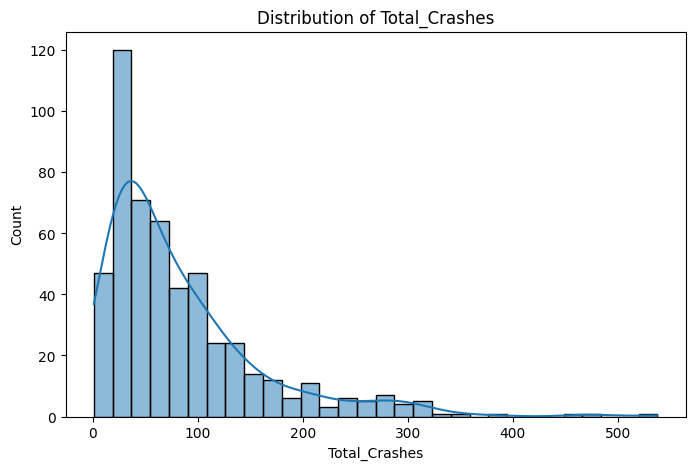

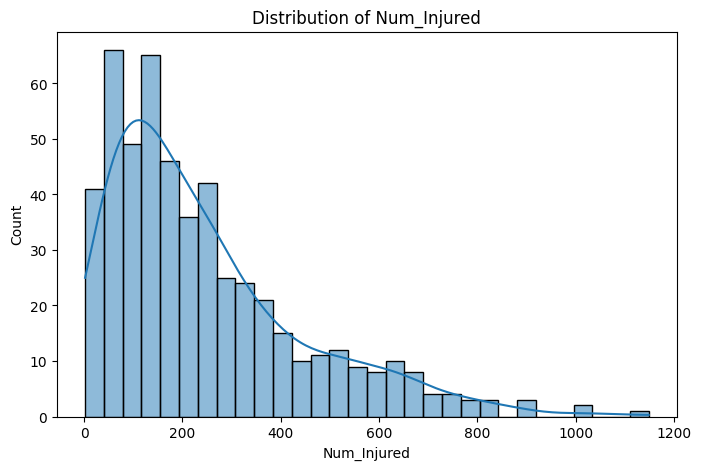

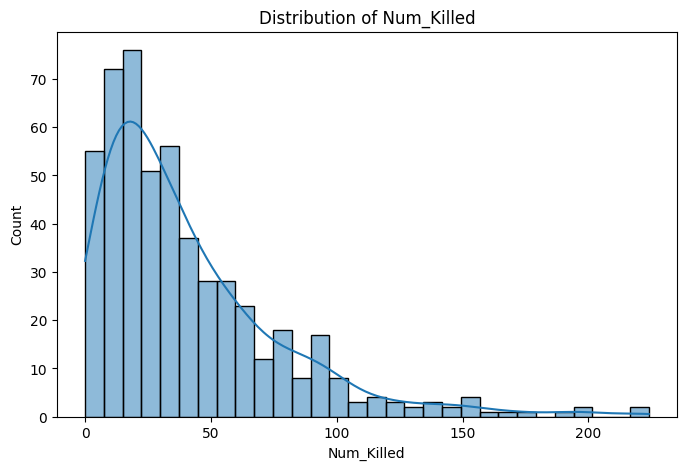

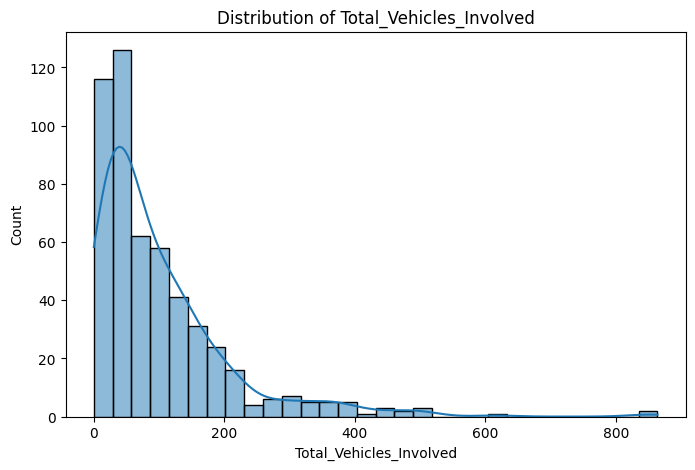

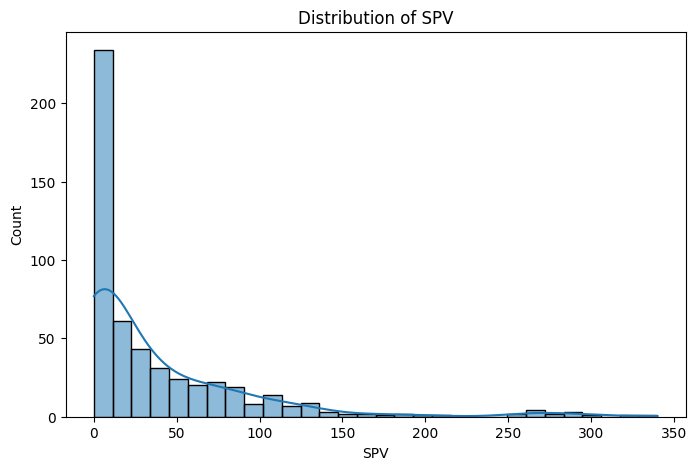

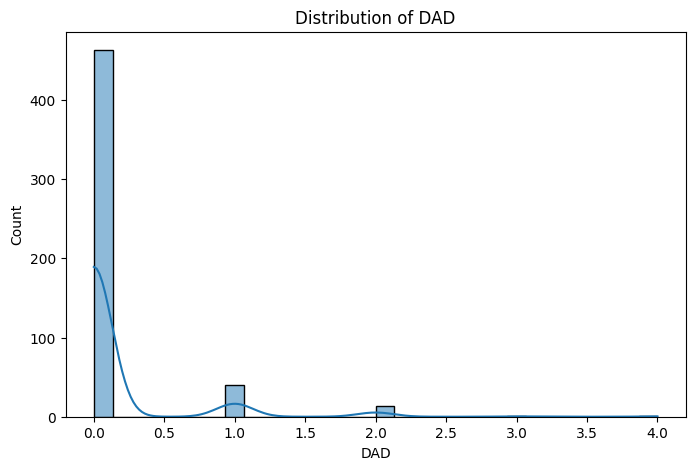

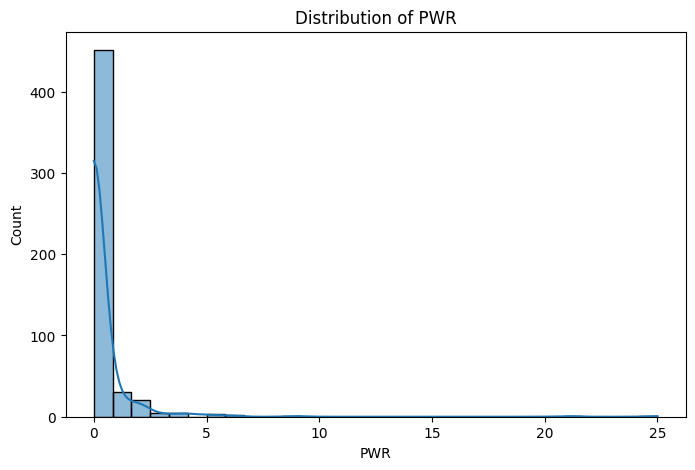

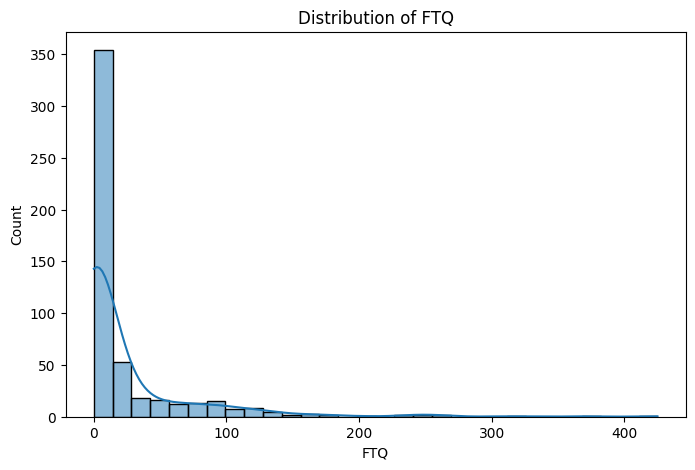

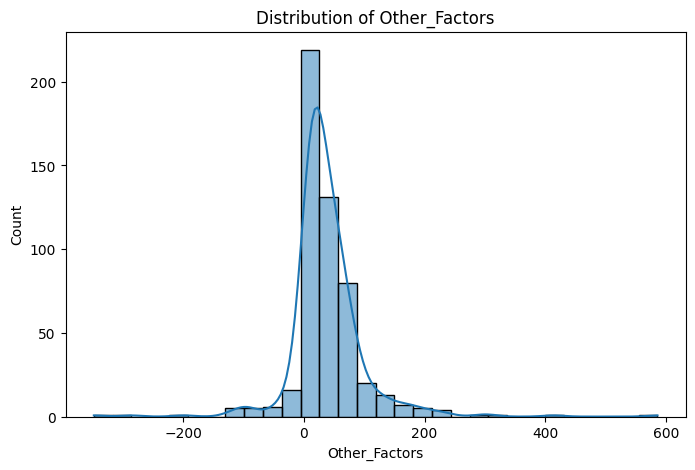

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

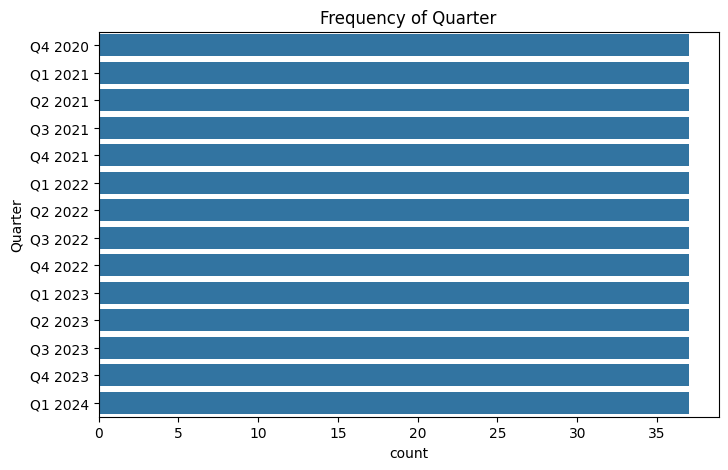

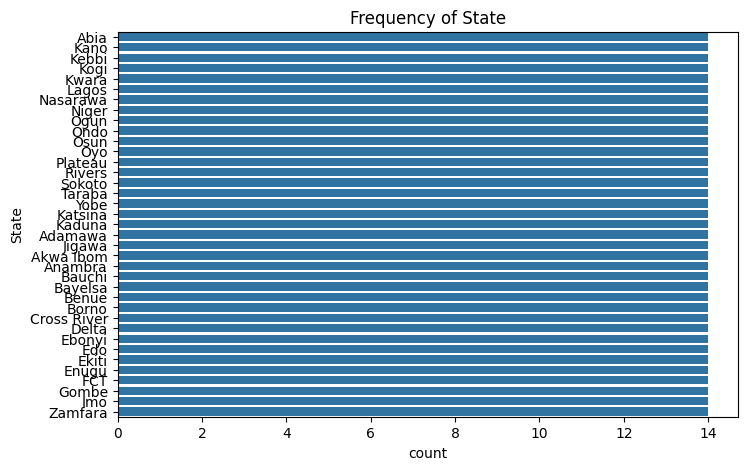

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.show()

Inference: There is an equal distribution of data in the quarter and state categorical columns.

## Bivariate Analysis

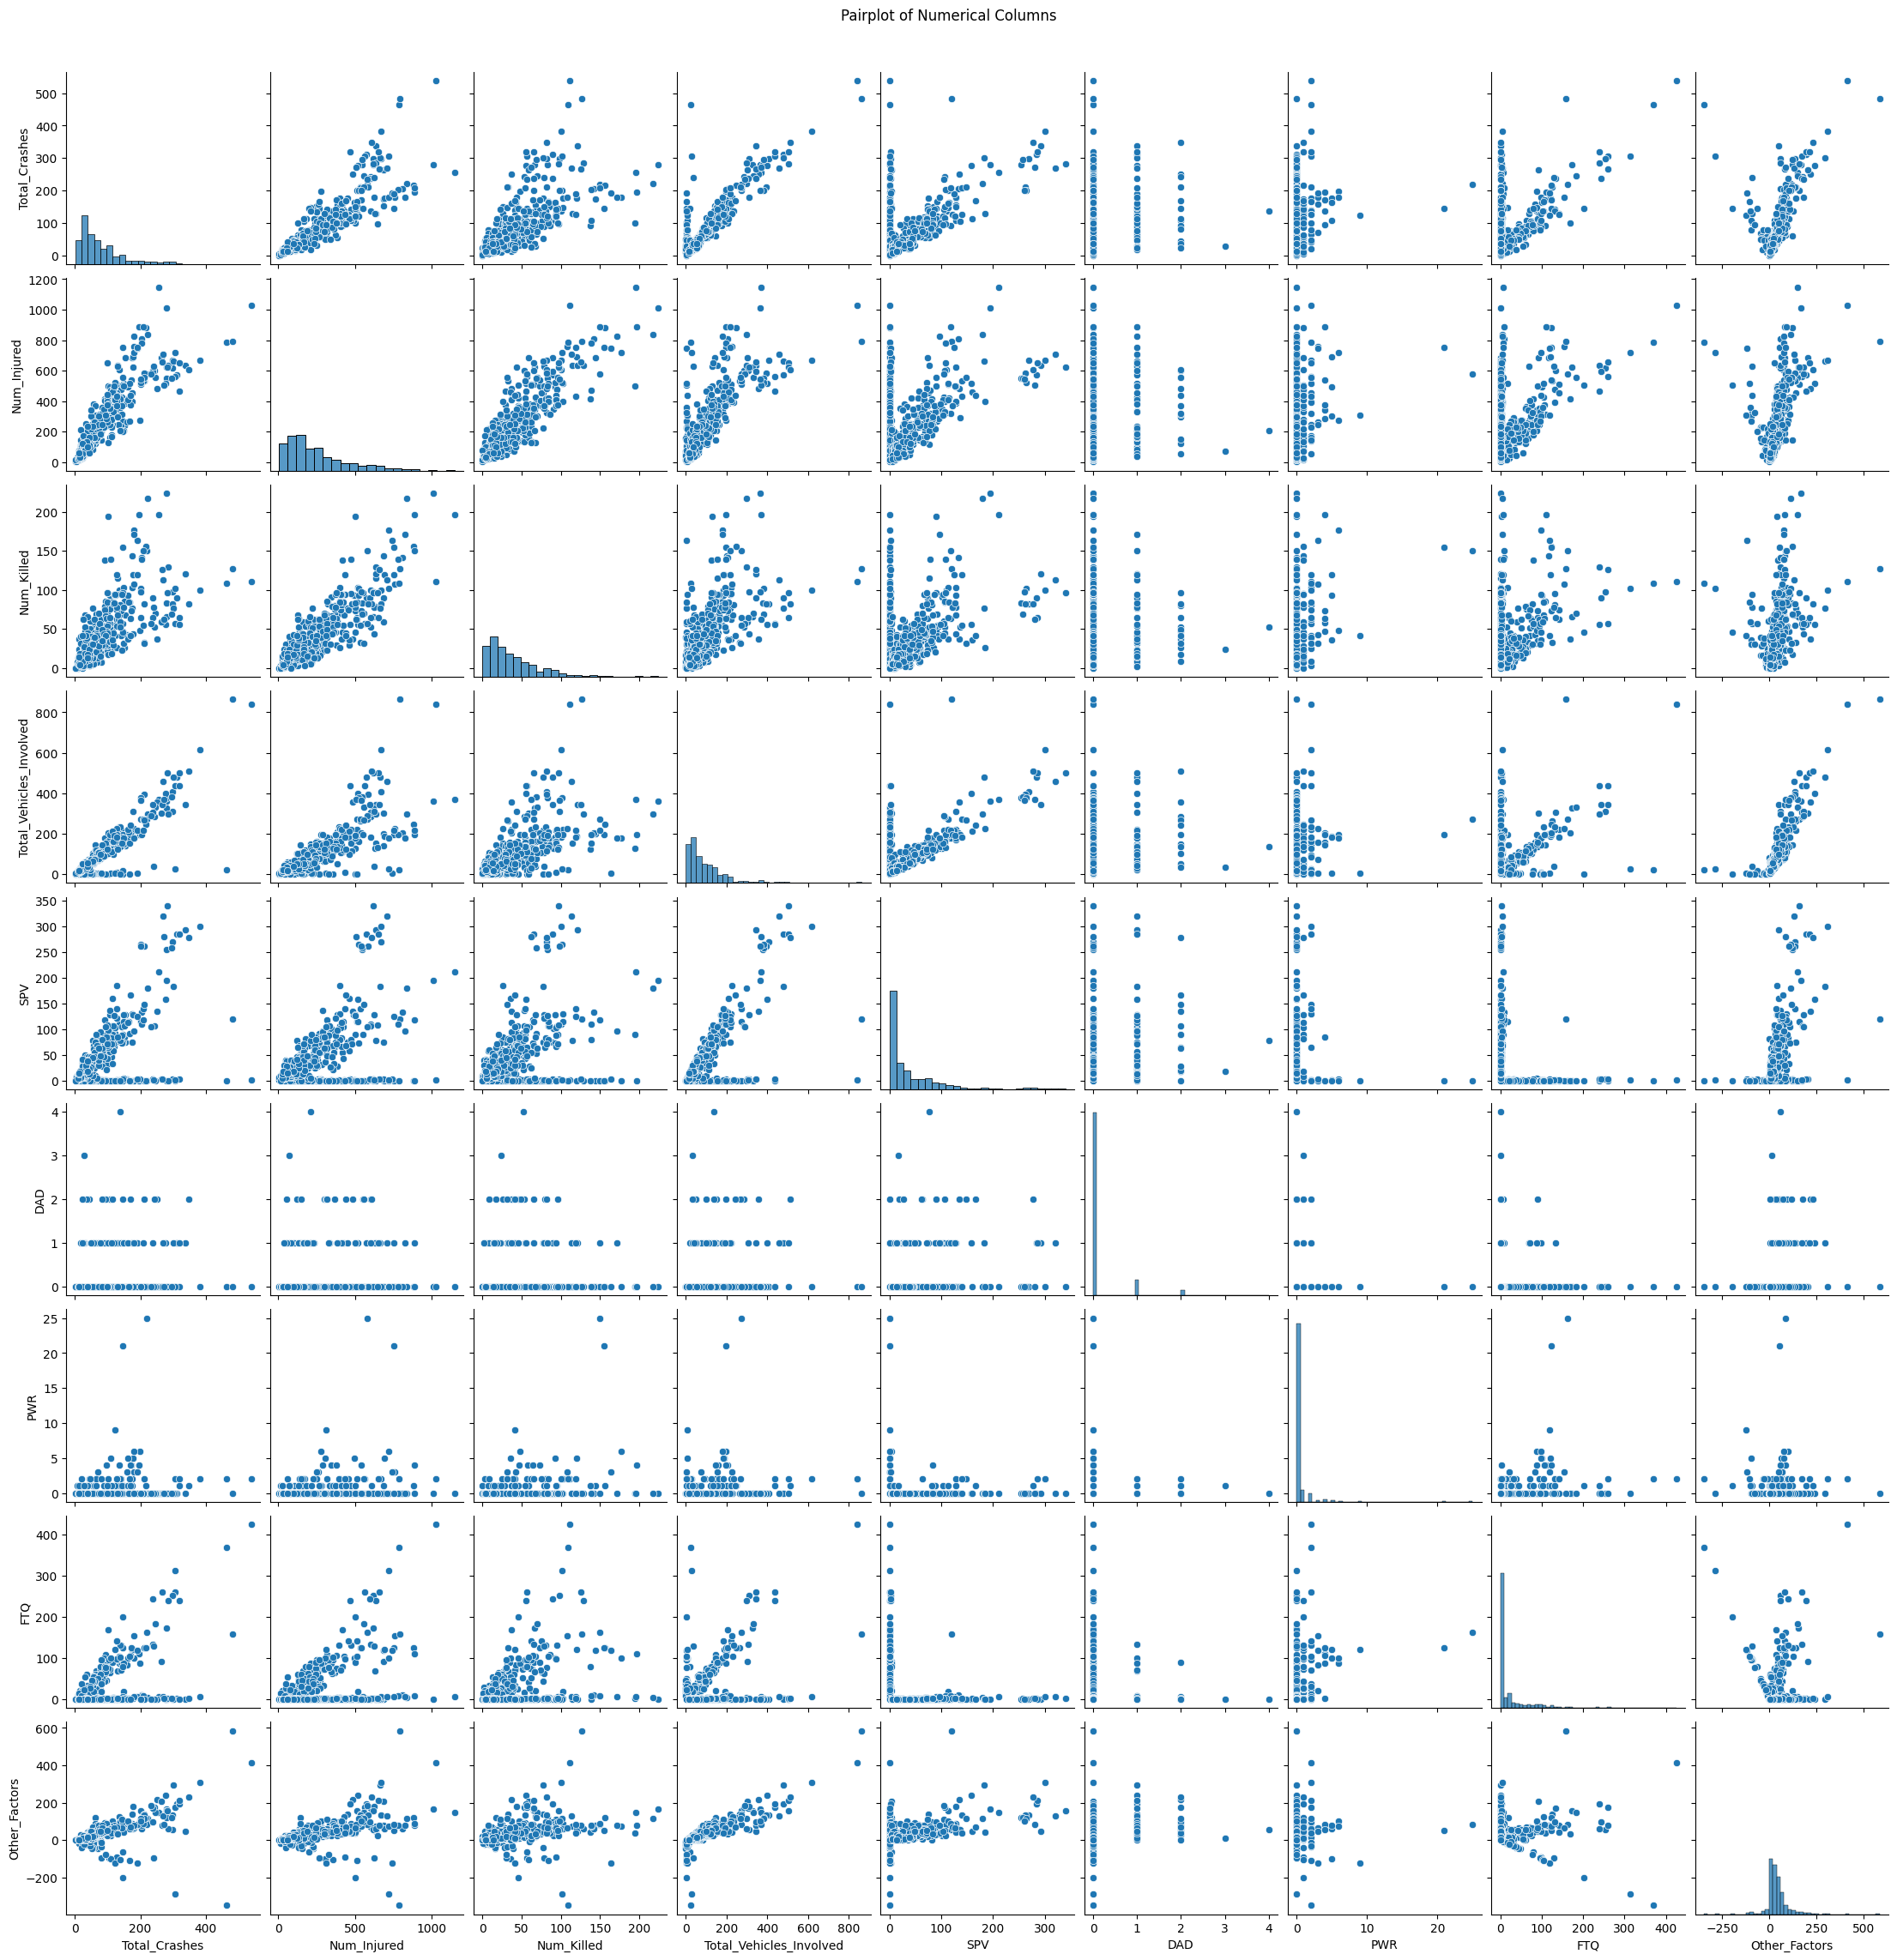

In [ ]:
# Numerical vs Numerical
if len(num_cols) > 1:
    sns.pairplot(df[num_cols])
    plt.suptitle('Pairplot of Numerical Columns', y=1.02)
    plt.show()

Inference:

In [ ]:
df['Year'] = df['Quarter'].apply(lambda x: x.split()[1])
df['Quarter'] = df['Quarter'].apply(lambda x: x.split()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
 11  Year                     518 non-null    object
dtypes: int64(9), object(3)
memory usage: 48.7+ KB


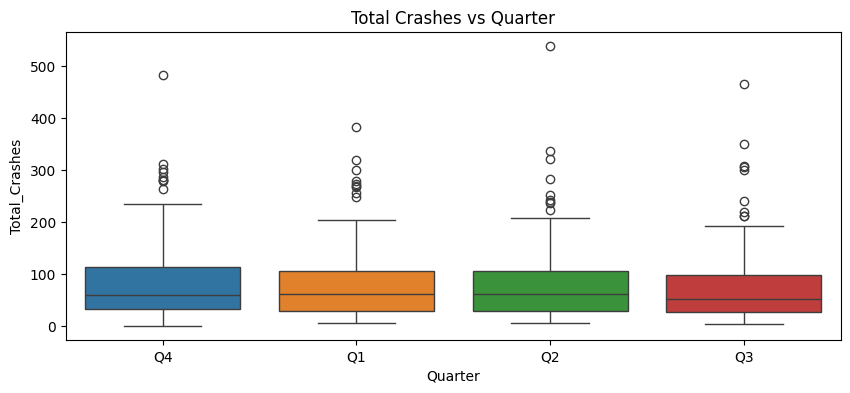

In [ ]:
# Box plot
plt.figure(figsize=(10, 4))

sns.boxplot(x='Quarter', y='Total_Crashes', data=df, hue='Quarter')
plt.title('Total Crashes vs Quarter')
plt.show()

### Inference:


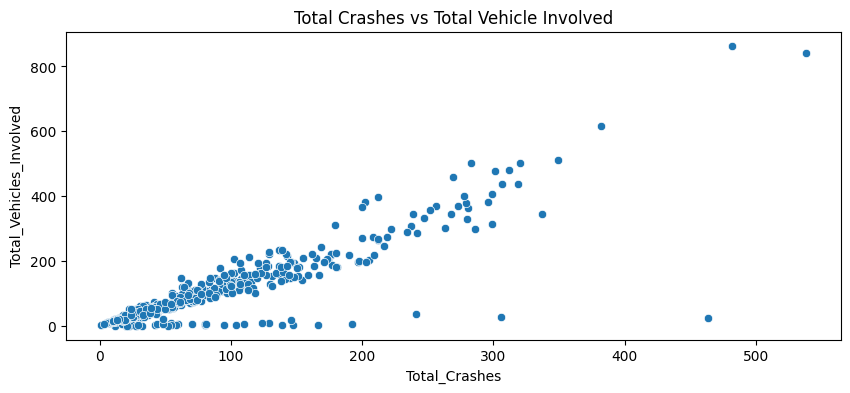

In [ ]:
# Scatter plot: Total crashes vs Total Vehicle involved
plt.figure(figsize=(10,4))
sns.scatterplot(x='Total_Crashes', y='Total_Vehicles_Involved', data=df)
plt.title("Total Crashes vs Total Vehicle Involved")
plt.show()

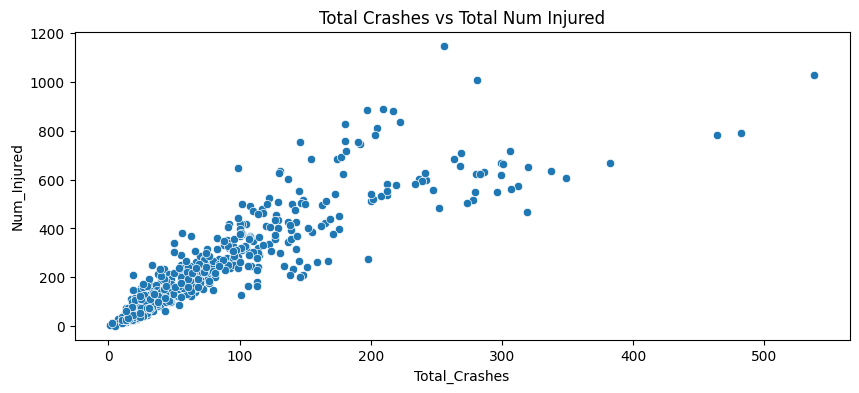

In [ ]:
# Scatter plot: Total Crashes vs Num_Injured
plt.figure(figsize=(10,4))
sns.scatterplot(x='Total_Crashes', y='Num_Injured', data=df)
plt.title("Total Crashes vs Total Num Injured")
plt.show()

## Line plot: Year vs Num_Injured (To see trend over years)


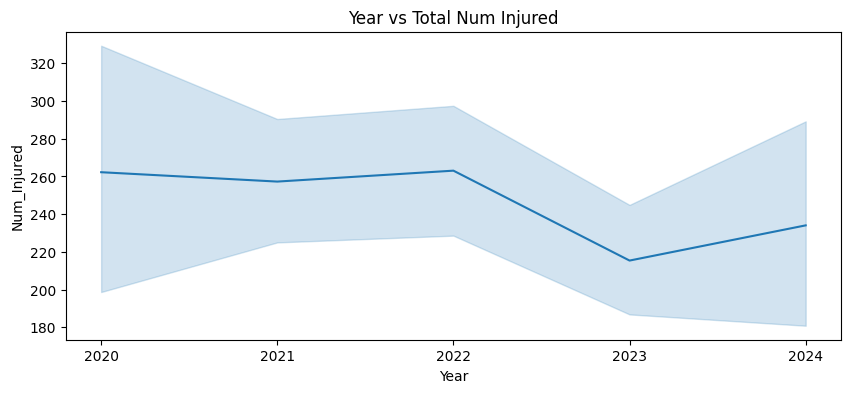

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Year', y='Num_Injured', data=df)
plt.title("Year vs Total Num Injured")
plt.show()

### Inference:
The line plot shows a consistent level of injuries from 2020-2022, followed by a reduction in 2023. Injuries then rose slightly in 2024.

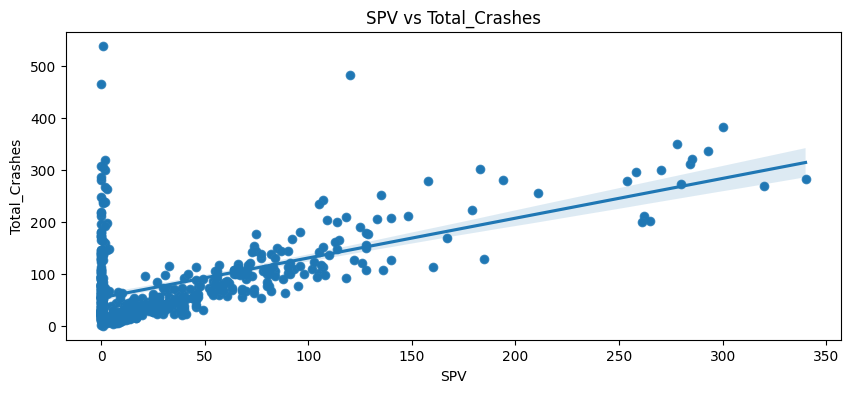

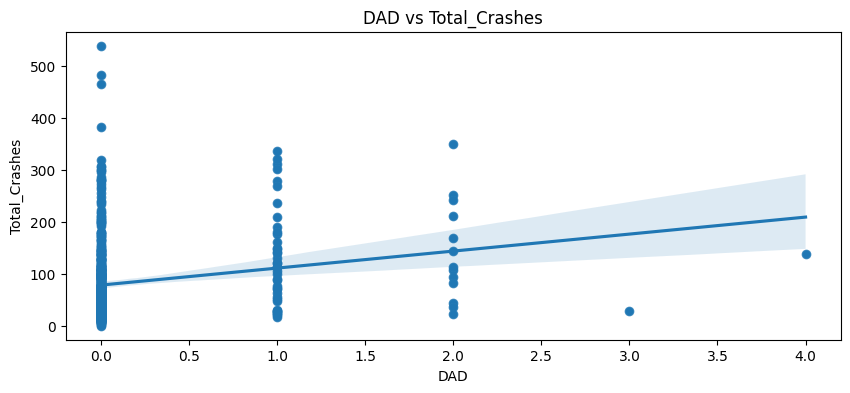

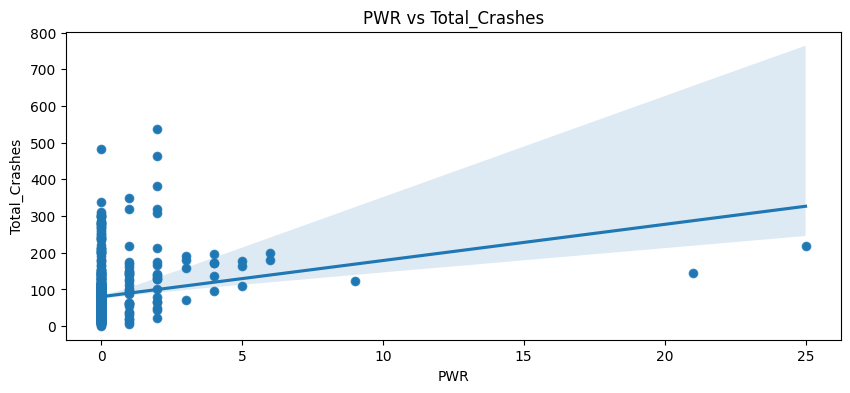

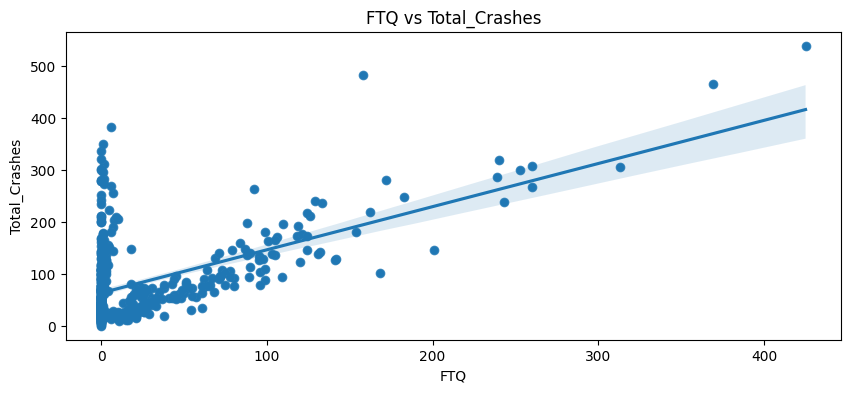

In [ ]:
factors = ['SPV', 'DAD', 'PWR', 'FTQ']

for f in factors:
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=f, y='Total_Crashes', data=df)
    sns.regplot(x=f, y='Total_Crashes', data=df)
    plt.title(f"{f} vs Total_Crashes")
    plt.show()

### Inference: 
- All relations has right skewness

## Statistics

### ANOVA Test (Analysis of Variance): are crashes similar in quarters?
 Checks if the average crash numbers in all quarters are roughly the same, or some quarter are different.
 Think of it like comparing different branches of a company to see if one is performing very differently from the others.

In [ ]:


from scipy import stats

# For each quarter, get the Total_Crashes values
groups = []
for _, group in df.groupby('Quarter'):
    groups.append(group['Total_Crashes'].values)
    
# Perform ANOVA
# f_oneway() compares the averages of each group    
# f_stat: how big the difference is between the groups ("F statistic")
# pvalue: probability that the observed differences happened by chance

f_stat, pvalue = stats.f_oneway(*groups)

print(f"F_statistic: {f_stat}, P_value: {pvalue}")

# H0 (null hypothesis): All quarters have the same average crash numbers (no real differences).
# if p < 0.05: the difference is too large to be random, so we reject H0 - meaning at least one quarter is different.
# if p >= 0.05: the differences could be due to random chance, so we keep H0 - meaning all quarters are similar.

if pvalue < 0.05:
    print("Significant differences found between quarters (Reject the H0)")
else:
    print("No significant differences found between quarters (Fail to Reject the H0)")    

F_statistic: 0.3796947993441266, P_value: 0.7676855424031097
No significant differences found between quarters (Fail to Reject the H0)


### Chi Square: State vs Total Crashes
Chi-Square test is used to determine if there's a significant association between two categorical variables.
Checks if there is a relationship between the state and the crash levels.


In [ ]:

'''
The function pd.qcut() from pandas is used to divide continuous numbers into categories (bins) — based on how the data is distributed.
	•	q stands for quantile — meaning “divide the data into equal-sized groups.”
	•	q=3 means: divide the data into 3 groups.
'''

# So qcut will categorize 'Total_Crashes' into 3 levels: Low, Medium, High
# Take the  Total_Crashes column, split it into 3 equal parts, and label them 'Low', 'Medium', 'High'
df['Crash_level'] = pd.qcut(df['Total_Crashes'], q=3, labels=['Low', 'Medium', 'High'])

print(df['Crash_level'].value_counts())

Crash_level
Low       175
Medium    172
High      171
Name: count, dtype: int64


In [ ]:
## This creates a summary table (called a “contingency table”) that shows how many times each State appears under each Crash Level (Low, Medium, High)
'''
    - pd.crosstab()

    This function in pandas is used to count how often combinations of two categories occur — like a mini table of frequencies.
    You give it two columns:
	•	The first one is what you want on the rows.
	•	The second one is what you want on the columns.
'''
contingency_table = pd.crosstab(df['State'], df['Crash_level'])
print(contingency_table.head())

## Why its called a contingency table?
##  In statistics, a contingency table is used to study the relationship between two categorical variables.

Crash_level  Low  Medium  High
State                         
Abia          13       1     0
Adamawa        4      10     0
Akwa Ibom     14       0     0
Anambra        6       8     0
Bauchi         0       3    11


In [ ]:
'''
chi2 - The Chi-Square statistic — a number that measures how different the observed data is from what would be expected if there was no relationship.

p - The p-value — this tells you how likely it is that the observed difference happened by chance.

dof - Degrees of freedom — a number that depends on how many categories you have.

expected - The expected frequencies — what the counts would have been if there was no relationship between State and Crash Level.

'''

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2: {chi2} \n P-value: {p} \n DoF: {dof}")

if p < 0.05:
    print("There is a significant difference in the State vs Total Crashes")
else:
    print("There is no significant difference in the State vs Total Crashes ")

Chi2: 692.0018612422531 
 P-value: 4.298692241425129e-102 
 DoF: 72
There is a significant difference in the State vs Total Crashes


Executive summary

## States with highest and lowest crashes

In [ ]:


# States with max values
max_total_crashes_state = df.loc[df['Total_Crashes'].idxmax()]['State']
max_num_injured_state = df.loc[df['Num_Injured'].idxmax()]['State']
max_num_of_killed_state = df.loc[df['Num_Killed'].idxmax()]['State']

# States with min values
minimum_crashes_state = df.loc[df['Total_Crashes'].idxmin()]['State']
minimum_num_injured_state = df.loc[df['Num_Injured'].idxmin()]['State']
minimum_num_killed_state = df.loc[df['Num_Killed'].idxmin()]['State']



print('State with highest of crashes: ', max_total_crashes_state)
print('State with highest of number of injury: ', max_num_injured_state)
print('State with highest of number of fatalities: ', max_num_of_killed_state)

print('\n')

print('State with lowest of crashes: ', minimum_crashes_state)
print('State with lowest of number of injury: ', minimum_num_injured_state)
print('State with lowest of number of fatalities: ', minimum_num_killed_state)


State with highest of crashes:  FCT
State with highest of number of injury:  Kaduna
State with highest of number of fatalities:  Kaduna


State with lowest of crashes:  Bayelsa
State with lowest of number of injury:  Bayelsa
State with lowest of number of fatalities:  Bayelsa


## Inferences


1. Total Crashes
- ~83.5 crashes per unit have been recorded
- Minimum no of crashed recorded was 1 with the maximum value of 538
- The large gab between mean and the maximum value indicates that there is a positive skewness which means only few units have high crash rates
- FCT has the highest number of crashes
- Bayelsa has the lowest number of crashes

2. Number of injured: 
- ~245.6 number of injured have been recorded
- Minimum number of injured was 2 while the highest was 1149
- The large gab between the mean (average) and maximum value means there is a positive skewness which means only few units where injured
- Kaduna has the highest number of injury
- Bayelsa has the lowest number of injuries


3. Number of people killed:
- An average of 40 recorded fatal accidents
- Minimum of fatal accidents was 0 while the highest was 224 recorded fatal cases 
- The large gab between the mean (average) and maximum value means there is a positive skewness which means only few recorded accidents were fatal
- Kaduna has the highest number of fatalities
- Bayelsa has the lowest number of fatalities



## Graphs

<Axes: xlabel='Year'>

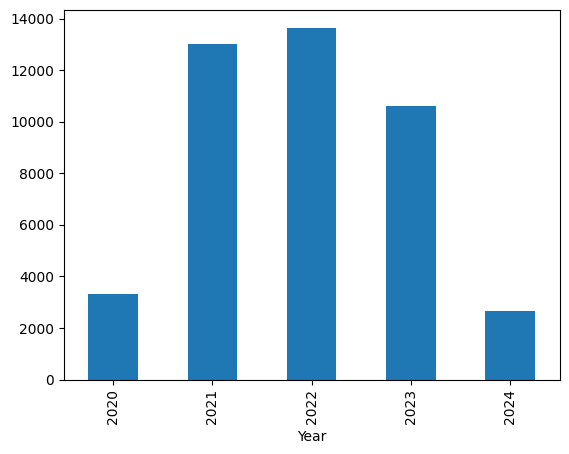

In [ ]:
## Graph of total crashes by Quarter
crashes_by_quarter = df.groupby('Year')['Total_Crashes'].sum()

crashes_by_quarter.plot(kind='bar')

<Axes: xlabel='State'>

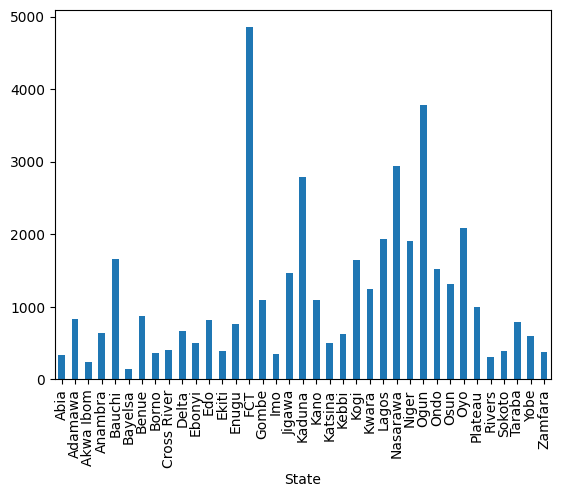

In [ ]:
## Graph of states by total crashes
crashes_by_states= df.groupby('State')['Total_Crashes'].sum()

# crashes_by_states

crashes_by_states.plot(kind='bar')

### Summary
- FCT and Kaduna seem to the states where more fatal accidents occurred and Bayelsa is the safest state with least number of recorded accidents and fatalities
- More accidents occurred in Q4 2022